In [41]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('Solarizedl')

# Case Study : Questions

# 1.

Bangalore   635


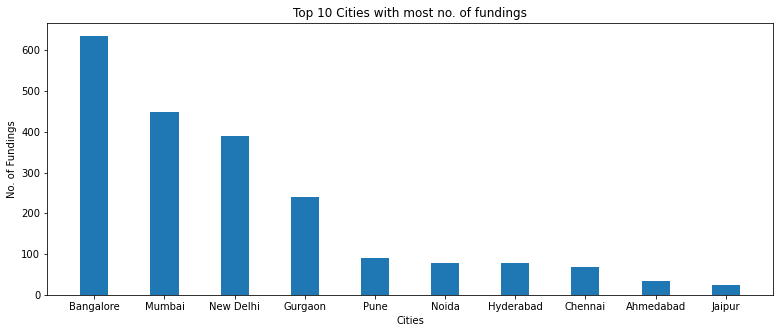

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import csv

file_obj = open("Files/startup_funding.csv", encoding='utf-8')
file_data = csv.DictReader(file_obj, skipinitialspace=True)
cities = []
for row in file_data:
    cities.append(row['CityLocation'])
np_cities = np.array(cities, dtype=str)
np_cities = np_cities[np_cities != '']
np_cities[np_cities == 'bangalore'] = 'Bangalore'
np_cities[np_cities == 'Delhi'] = 'New Delhi'
for i in range(len(np_cities)):
    if 'bangalore' in np_cities[i]:
        np_cities[i] = 'Bangalore'
    if np_cities[i] == 'Delhi':
        np_cities[i] = 'New Delhi'
for i in range(len(np_cities)):
    np_cities[i] = np_cities[i].split('/')[0].strip()
dict = {}
for city in np_cities:
    if city in dict:
        dict[city] += 1
    else:
        dict[city] = 1
x = []
y = []
for i in dict:
    x.append(i)
    y.append(dict[i])
np_x = np.array(x)
np_y = np.array(y)
np_x = np_x[np.argsort(np_y)][-10:]
np_y = np.sort(np_y)[-10:]
    #plt.pie(np_y, labels=np_x, autopct="%.2f%%", explode=[.15,.15,.15,.15,.15,.15,.15,.15,.15,.15])
    #plt.axis("equal")
    #plt.show()
np_x = np_x[::-1]
np_y = np_y[::-1]
print(np_x[0], " ", np_y[0])
fig = plt.figure(figsize=(13, 5))
plt.bar(np_x, np_y, width=0.4)
plt.xlabel("Cities")
plt.ylabel("No. of Fundings")
plt.title("Top 10 Cities with most no. of fundings")
plt.show()

# 2.

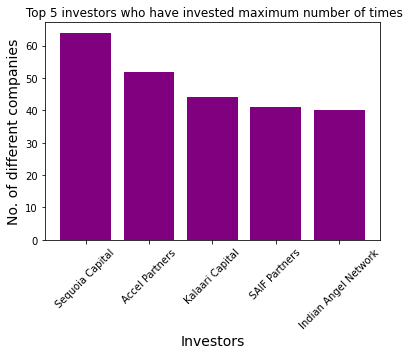

Sequoia Capital   64
Accel Partners   52
Kalaari Capital   44
SAIF Partners   41
Indian Angel Network   40


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data=pd.read_csv('Files/startup_funding.csv')
df=data.copy()
np_investors=np.array(df.InvestorsName, dtype='str')
investor=[]
for i in range(len(np_investors)):
    if np_investors[i]!='nan':
        if not('Undisclosed' in np_investors[i] or 'undisclosed' in np_investors[i]):
            for j in np_investors[i].split(','):
                        if j.strip()!='':
                            investor.append(j.strip())
np_investors=np.array(investor)
dic={}
for i in range(len(np_investors)):
    if np_investors[i] in dic.keys():
        dic[np_investors[i]] += 1
    else:
        dic[np_investors[i]] = 1
x=[]
y=[]
for i in dic.keys():
    x.append(i)
    y.append(dic[i])
np_x=np.array(x)
np_y=np.array(y)

np_x=np_x[np.argsort(np_y)][len(np_x)-1:len(np_x)-1-5:-1]
np_y=np.sort(np_y)[len(np_y)-1:len(np_y)-1-5:-1]

plt.bar(np_x, np_y, color='purple')
plt.xlabel('Investors', size=14)
plt.ylabel('No. of different companies', size=14)
plt.title(' Top 5 investors who have invested maximum number of times', size=12)
plt.xticks(rotation=45)
plt.show()

for i in range(len(np_x)):
    print(np_x[i], " ", np_y[i])

# 3.

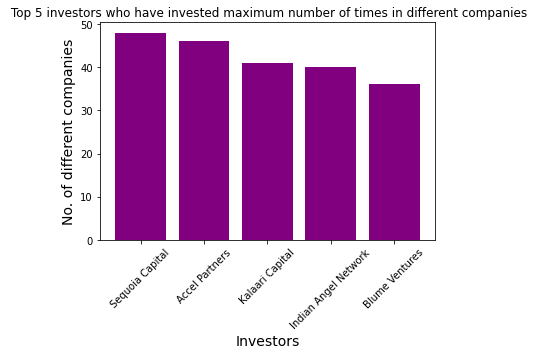

Sequoia Capital   48
Accel Partners   46
Kalaari Capital   41
Indian Angel Network   40
Blume Ventures   36


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data=pd.read_csv('Files/startup_funding.csv')
df=data.copy()

np_startup=np.array(df.StartupName)
np_investors=np.array(df.InvestorsName, dtype='str')

investor=[]
startup=[]

for i in range(len(np_startup)):
    if np_investors[i]!='nan':
        if not('Undisclosed' in np_investors[i] or 'undisclosed' in np_investors[i]):
            for j in np_investors[i].split(','):
                if j.strip()!='':
                    investor.append(j.strip())
                    startup.append(np_startup[i])
for i in range(len(startup)):
    if 'Ola' in startup[i]:
        startup[i]='Ola'
    if 'Flipkart' in startup[i]:
        startup[i]='Flipkart'
    if 'Oyo' in startup[i] or 'OYO Rooms' in startup[i]:
        startup[i]='Oyo'
    if 'Paytm' in startup[i]:
        startup[i]='Paytm'
np_investors=np.array(investor)
np_startup=np.array(startup)
dic={}
for i in range(len(np_startup)):
    s=set()
    if np_investors[i] in dic.keys():
        dic[np_investors[i]].add(np_startup[i])
    else:
        s.add(np_startup[i])
        dic[np_investors[i]]=s
d={}
for i in dic.keys():
    if i in d.keys():
        d[i]+=len(dic[i])
    else:
        d[i]=len(dic[i])
x=[]
y=[]
for i in d.keys():
    x.append(i)
    y.append(d[i])
np_x=np.array(x)
np_y=np.array(y)

np_x=np_x[np.argsort(np_y)]
np_y=np.sort(np_y)

np_x=np_x[len(np_x)-1:len(np_x)-1-5:-1]
np_y=np_y[len(np_y)-1:len(np_y)-1-5:-1]

plt.bar(np_x, np_y, color='purple')
plt.xlabel('Investors', size=14)
plt.ylabel('No. of different companies', size=14)
plt.title(' Top 5 investors who have invested maximum number of times in different companies', size=12)
plt.xticks(rotation=45)
plt.show()

for i in range(len(np_x)):
    print(np_x[i], " ", np_y[i])

# 4.

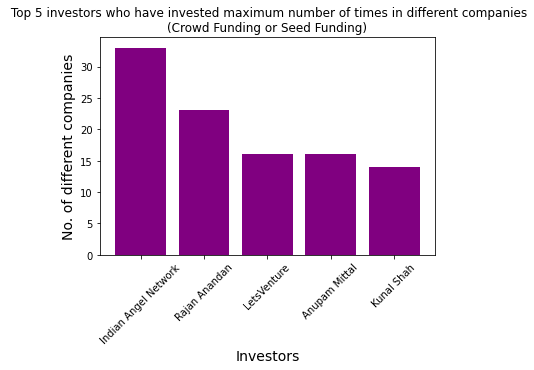

Indian Angel Network   33
Rajan Anandan   23
LetsVenture   16
Anupam Mittal   16
Kunal Shah   14


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data=pd.read_csv('Files/startup_funding.csv')
df=data.copy()
df=df[pd.notnull(df.InvestmentType)]
df.loc[df.InvestmentType=='SeedFunding', 'InvestmentType']='Seed Funding'
df.loc[df.InvestmentType=='PrivateEquity', 'InvestmentType']='Private Equity'
df.loc[df.InvestmentType=='Crowd funding', 'InvestmentType']='Crowd Funding'
df.reset_index(inplace=True, drop=True)
df=df[df.InvestmentType!='Debt Funding']
df=df[df.InvestmentType!='Private Equity']
#df=df[df.InvestmentType=='Crowd Funding' or df.InvestmentType=='Seed Funding']

df.reset_index(inplace=True, drop=True)

np_startup=np.array(df.StartupName)
np_investors=np.array(df.InvestorsName, dtype='str')

investor=[]
startup=[]

for i in range(len(np_startup)):
    if np_investors[i]!='nan':
        if not('Undisclosed' in np_investors[i] or 'undisclosed' in np_investors[i]):
            for j in np_investors[i].split(','):
                if j.strip()!='':
                    investor.append(j.strip())
                    startup.append(np_startup[i])
for i in range(len(startup)):
    if 'Ola' in startup[i]:
        startup[i]='Ola'
    if 'Flipkart' in startup[i]:
        startup[i]='Flipkart'
    if 'Oyo' in startup[i] or 'OYO Rooms' in startup[i]:
        startup[i]='Oyo'
    if 'Paytm' in startup[i]:
        startup[i]='Paytm'
np_investors=np.array(investor)
np_startup=np.array(startup)
dic={}
for i in range(len(np_startup)):
    s=set()
    if np_investors[i] in dic.keys():
        dic[np_investors[i]].add(np_startup[i])
    else:
        s.add(np_startup[i])
        dic[np_investors[i]]=s
d={}
for i in dic.keys():
    if i in d.keys():
        d[i]+=len(dic[i])
    else:
        d[i]=len(dic[i])
x=[]
y=[]
for i in d.keys():
    x.append(i)
    y.append(d[i])
np_x=np.array(x)
np_y=np.array(y)

np_x=np_x[np.argsort(np_y)]
np_y=np.sort(np_y)

np_x=np_x[len(np_x)-1:len(np_x)-1-5:-1]
np_y=np_y[len(np_y)-1:len(np_y)-1-5:-1]

plt.bar(np_x, np_y, color='purple')
plt.xlabel('Investors', size=14)
plt.ylabel('No. of different companies', size=14)
plt.title(' Top 5 investors who have invested maximum number of times in different companies\n(Crowd Funding or Seed Funding)', size=12)
plt.xticks(rotation=45)
plt.show()

for i in range(len(np_x)):
    print(np_x[i], " ", np_y[i])

# 5.

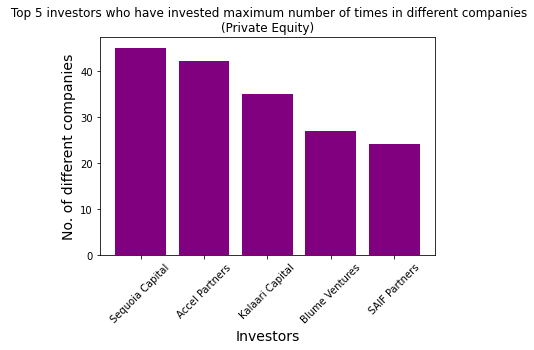

Sequoia Capital   45
Accel Partners   42
Kalaari Capital   35
Blume Ventures   27
SAIF Partners   24


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data=pd.read_csv('Files/startup_funding.csv')
df=data.copy()
df=df[pd.notnull(df.InvestmentType)]
df.loc[df.InvestmentType=='SeedFunding', 'InvestmentType']='Seed Funding'
df.loc[df.InvestmentType=='PrivateEquity', 'InvestmentType']='Private Equity'
df.loc[df.InvestmentType=='Crowd funding', 'InvestmentType']='Crowd Funding'
df.reset_index(inplace=True, drop=True)
df=df[df.InvestmentType!='Crowd Funding']
df=df[df.InvestmentType!='Debt Funding']
df=df[df.InvestmentType!='Seed Funding']

df.reset_index(inplace=True, drop=True)

np_startup=np.array(df.StartupName)
np_investors=np.array(df.InvestorsName, dtype='str')

investor=[]
startup=[]

for i in range(len(np_startup)):
    if np_investors[i]!='nan':
        if not('Undisclosed' in np_investors[i] or 'undisclosed' in np_investors[i]):
            for j in np_investors[i].split(','):
                if j.strip()!='':
                    investor.append(j.strip())
                    startup.append(np_startup[i])
for i in range(len(startup)):
    if 'Ola' in startup[i]:
        startup[i]='Ola'
    if 'Flipkart' in startup[i]:
        startup[i]='Flipkart'
    if 'Oyo' in startup[i] or 'OYO Rooms' in startup[i]:
        startup[i]='Oyo'
    if 'Paytm' in startup[i]:
        startup[i]='Paytm'
np_investors=np.array(investor)
np_startup=np.array(startup)
dic={}
for i in range(len(np_startup)):
    s=set()
    if np_investors[i] in dic.keys():
        dic[np_investors[i]].add(np_startup[i])
    else:
        s.add(np_startup[i])
        dic[np_investors[i]]=s
d={}
for i in dic.keys():
    if i in d.keys():
        d[i]+=len(dic[i])
    else:
        d[i]=len(dic[i])
x=[]
y=[]
for i in d.keys():
    x.append(i)
    y.append(d[i])
np_x=np.array(x)
np_y=np.array(y)

np_x=np_x[np.argsort(np_y)]
np_y=np.sort(np_y)

np_x=np_x[len(np_x)-1:len(np_x)-1-5:-1]
np_y=np_y[len(np_y)-1:len(np_y)-1-5:-1]

plt.bar(np_x, np_y, color='purple')
plt.xlabel('Investors', size=14)
plt.ylabel('No. of different companies', size=14)
plt.title(' Top 5 investors who have invested maximum number of times in different companies\n(Private Equity)', size=12)
plt.xticks(rotation=45)
plt.show()

for i in range(len(np_x)):
    print(np_x[i], " ", np_y[i])